# Pandas: Data Management 3

*Author: Evan Carey*

*Copyright 2017-2019, BH Analytics, LLC*

## Overview

In this section, we will continue coverage of data management using Pandas. 

Our Objectives for this section are:

*  Sorting Dataframes
*  Random Sampling Dataframes
*  Deal with Missing Data
*  Merging Dataframes

## Data for this Session: Healthcare Visits

To demonstrate these concepts, we will use some simulated data from a health care system. There are two files we will use throughout this section. 

*  The first file is called `Patient.csv`, and is information about patients in the healthcare system. There should be one row per patient in this file, so we call this a patient level file. 

*  The second file is called `OutpatientVisit.csv`, and is information about individual visits to the doctor for patients in the healthcare system. There will be more than one row per patient in this file, since patients can have more than one visit. However, there should only be one row per visit, so we call this a visit-level file. 

The files are located here: 

* data/healthcare/Patient.csv
* data/healthcare/OutpatientVisit.csv

## Libraries

In [1]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import textwrap

In [2]:
# Enable inline plotting for graphics
%matplotlib inline

There are a few new packages here we are calling! 

* Pandas is the data management package that we will focus on. 
* Numpy is the numerical computation package in Python. You can think of this as part of the engine under the hood of Pandas...
* Matplotlib is the main plotting package in Python
* Seaborn is an 'add-on' plotting package that is based on Matplotlib. More details on these to come later!

In [3]:
# Get Version information
print(textwrap.fill(sys.version),'\n')
print("Pandas version: {0}".format(pd.__version__),'\n')
print("Matplotlib version: {0}".format(matplotlib.__version__),'\n')
print("Numpy version: {0}".format(np.__version__),'\n')
print("Seaborn version: {0}".format(sns.__version__),'\n')

3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)] 

Pandas version: 0.24.2 

Matplotlib version: 3.0.3 

Numpy version: 1.16.2 

Seaborn version: 0.9.0 



In [4]:
# So all output comes through from Ipython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Check your working directory

Subsequent sessions may require you to identify and update your working directory so paths correctly point at the downloaded data files. You can check your working directory like so:

In [2]:
# Working Directory
import os
print("My working directory:\n" + os.getcwd())
# Set Working Directory 
os.chdir(r"/home/ra/host/BH_Analytics/Discover/DataEngineering/")
print("My new working directory:\n" + os.getcwd())

My working directory:
/home/ra/host/BH_Analytics/Discover/DataEngineering/notebooks
My new working directory:
/home/ra/host/BH_Analytics/Discover/DataEngineering


## Set options

Here I set the max printing rows to be 10, so I don't overwhelm the printed workbooks or these presentation materials. You can change this to a larger number since you are running this on your own machine. 

In [6]:
pd.options.display.max_rows = 10

## Importing structured data

We will start by importing the patient and visits data. Check both of these files using a text editor first:

* Do they have column names in the first row?
* What is the delimiter? Is it actually a CSV?
* How many rows and columns does the file have? 

In [7]:
## import data
df_patient = pd.read_csv("data/Data_Sims/healthcare/Patient.csv")
df_visits = pd.read_csv("data/Data_Sims/healthcare/OutpatientVisit.csv")

Following import, you can examine the top and bottom of the dataframe simply by calling the object:

In [8]:
df_patient

,PatientID,FirstName,LastName,State,ZipCode,DateOfBirth,Gender,Race,Income
0,1,Loretta,Gunter,FL,32250,1979-03-29,female,white,29.0
1,2,Todd,Rea,TX,79602,1936-12-20,male,Missing,NaN
2,3,Margaret,Goodwin,PA,18106,1948-04-19,female,hispanic,53.0
3,4,Anna,McCullough,TX,75039,1997-08-28,female,Missing,20.0
4,5,Glenn,Labrecque,NM,87102,1985-08-19,male,Missing,48.0
...,...,...,...,...,...,...,...,...,...
19995,19996,Lucia,Atkins,MI,49546,1970-01-26,female,white,166.0
19996,19997,Wilfredo,Reinhardt,CO,80112,1950-02-23,male,other,31.0
19997,19998,Thanh,Large,FL,33912,1957-11-24,male,black,60.0
19998,19999,Deidre,Croft,GA,30303,1965-01-24,female,Unknown,NaN


In [9]:
df_visits

,VisitID,StaffID,PatientID,VisitDate,ICD10_1,ICD10_2,ICD10_3,ClinicCode
0,1,24,1,2011-08-05,G801,NaN,NaN,7
1,2,13,1,2013-06-15,G801,NaN,NaN,49
2,3,36,1,2013-12-28,G801,NaN,NaN,42
3,4,14,1,2014-10-21,G801,NaN,NaN,29
4,5,45,1,2015-05-11,G801,NaN,NaN,21
...,...,...,...,...,...,...,...,...
181391,181392,44,20000,2011-08-26,E1322,NaN,NaN,17
181392,181393,28,20000,2012-01-05,E1322,NaN,NaN,57
181393,181394,32,20000,2012-01-23,E1322,NaN,NaN,15
181394,181395,38,20000,2012-05-10,E1322,NaN,NaN,1


## Reindexing Dataframes

We often take a subset of a dataframe, and we may need to reindex the rows afterwards.   
This is not done automatically post-subset!

In [10]:
# Reindex
df_patient_sub = df_patient[df_patient['Income'] > 500]
df_patient_sub

,PatientID,FirstName,LastName,State,ZipCode,DateOfBirth,Gender,Race,Income
8,9,William,Fontenot,OH,45402,1938-04-24,male,,1093.0
60,61,Tara,Anderson,AL,36303,1879-10-30,female,white,1138.0
61,62,Diego,Yang,PA,18621,1956-11-24,male,NaN,1093.0
72,73,Lauren,Sturdevant,UT,84104,1997-04-18,female,Missing,1131.0
99,100,Amanda,Delgado,KS,67107,1976-11-05,female,,1079.0
...,...,...,...,...,...,...,...,...,...
19889,19890,Adam,Carr,LA,71101,1998-01-13,male,white,1013.0
19900,19901,James,Thurman,OH,43950,1958-10-18,male,other,1063.0
19937,19938,Curtis,Owens,CT,6492,1979-04-03,male,white,1108.0
19952,19953,Olive,Hansen,IL,60191,1960-06-28,female,white,1023.0


We then reset the index with `reset_index()` method. 

In [11]:
df_patient_sub = df_patient_sub.reset_index()
df_patient_sub.head()

,index,PatientID,FirstName,LastName,State,ZipCode,DateOfBirth,Gender,Race,Income
0,8,9,William,Fontenot,OH,45402,1938-04-24,male,,1093.0
1,60,61,Tara,Anderson,AL,36303,1879-10-30,female,white,1138.0
2,61,62,Diego,Yang,PA,18621,1956-11-24,male,NaN,1093.0
3,72,73,Lauren,Sturdevant,UT,84104,1997-04-18,female,Missing,1131.0
4,99,100,Amanda,Delgado,KS,67107,1976-11-05,female,,1079.0


In [12]:
del df_patient_sub["index"]
df_patient_sub.head()

,PatientID,FirstName,LastName,State,ZipCode,DateOfBirth,Gender,Race,Income
0,9,William,Fontenot,OH,45402,1938-04-24,male,,1093.0
1,61,Tara,Anderson,AL,36303,1879-10-30,female,white,1138.0
2,62,Diego,Yang,PA,18621,1956-11-24,male,NaN,1093.0
3,73,Lauren,Sturdevant,UT,84104,1997-04-18,female,Missing,1131.0
4,100,Amanda,Delgado,KS,67107,1976-11-05,female,,1079.0


Notice the extra column of the index was added by default. We can get rid of that with `drop=True`. 

In [13]:
# Alternatively, all in one line of code
df_patient_sub = df_patient_sub.reset_index(drop=True)
df_patient_sub.head()

,PatientID,FirstName,LastName,State,ZipCode,DateOfBirth,Gender,Race,Income
0,9,William,Fontenot,OH,45402,1938-04-24,male,,1093.0
1,61,Tara,Anderson,AL,36303,1879-10-30,female,white,1138.0
2,62,Diego,Yang,PA,18621,1956-11-24,male,NaN,1093.0
3,73,Lauren,Sturdevant,UT,84104,1997-04-18,female,Missing,1131.0
4,100,Amanda,Delgado,KS,67107,1976-11-05,female,,1079.0


## Sorting a Dataframe

We use `.sort_values()` to sort a data frame.

We can sort by either the index or a column(s)

In [14]:
# Sorting
df_patient.sort_values("Income").head()

,PatientID,FirstName,LastName,State,ZipCode,DateOfBirth,Gender,Race,Income
12225,12226,Emily,Locher,MO,63362,1966-08-12,MISSING,white,3.0
188,189,Mary,James,CT,6902,1985-04-04,MISSING,white,3.0
10879,10880,Dean,Ragland,PA,19123,1960-02-28,male,Missing,3.0
6649,6650,Barbara,O'Donnell,MS,38901,1845-03-07,female,Unknown,4.0
12437,12438,Billy,Dickson,PA,19403,1939-07-26,male,hispanic,4.0


In [15]:
# Sort by descending
df_patient.sort_values("Income", ascending=False).head()

,PatientID,FirstName,LastName,State,ZipCode,DateOfBirth,Gender,Race,Income
16454,16455,Judy,Hasbrouck,IL,60089,1940-05-18,female,white,1780.0
245,246,Charlie,Hilliard,NJ,8102,1970-05-06,male,hispanic,1613.0
4945,4946,Jerry,Bell,MD,21201,1977-04-22,male,black,1462.0
13729,13730,Charles,Strayhorn,IL,60653,1845-03-02,NaN,,1412.0
11407,11408,James,Eckert,SC,29601,1988-08-22,male,Missing,1412.0


In [16]:
# Multiple sorts
df_patient.sort_values(by=["Gender", "Income"]).head()

,PatientID,FirstName,LastName,State,ZipCode,DateOfBirth,Gender,Race,Income
188,189,Mary,James,CT,6902,1985-04-04,MISSING,white,3.0
12225,12226,Emily,Locher,MO,63362,1966-08-12,MISSING,white,3.0
2226,2227,Eva,Berry,FL,32401,NaN,MISSING,other,4.0
10544,10545,Kay,Kohr,MI,48864,1937-12-07,MISSING,other,6.0
13114,13115,Mark,Brown,MO,64060,1976-10-30,MISSING,Missing,6.0


In [17]:
# Mixture of descending and ascending sorts
df_patient.sort_values(by=["Gender", "Income"], ascending=[True, False])

,PatientID,FirstName,LastName,State,ZipCode,DateOfBirth,Gender,Race,Income
1090,1091,Garry,Provost,CA,92020,1977-02-08,MISSING,white,1382.0
8641,8642,Cedrick,Millan,CA,93240,1977-07-01,MISSING,black,1201.0
18120,18121,India,Neal,CT,6702,1964-11-27,MISSING,hispanic,1194.0
1243,1244,Lorraine,Hughes,AK,99503,1960-01-02,MISSING,?,1150.0
13540,13541,Sue,Bright,NJ,7305,1970-08-16,MISSING,white,1144.0
...,...,...,...,...,...,...,...,...,...
18072,18073,Henry,Carmody,CO,80202,NaN,NaN,hispanic,NaN
18900,18901,George,Golden,MS,39213,1969-03-30,NaN,white,NaN
19128,19129,Jennifer,Beason,DC,20005,1943-04-12,NaN,black,NaN
19642,19643,Eleanor,Ratcliff,NJ,7087,1983-02-21,NaN,white,NaN


## Missing Data in Dataframes

Accounting for missing data is an important part of any analysis. You first need to be able to notice and quantify the missing data in your dataframe. After that, you should think carefully about why the data is missing, and what process led to it being missing.  

> Question: What happens to missing data if we ignore it in an analysis? For example, if you run a linear regression with missing data, what happens?

Missing data mechanics: 
* Missing data is represented as NaN in a dataframe. 
* Pandas can deal with missing data appropriately inside of functions. 


When you have missing data, you generally need to do the following things:

* Quantify the missingness. How much is missing in each column? 
* Flag the missing values so you can hopefully retrieve them by asking the source of your data to send you the missing elements. 
* Exclude the rows with missing elements from your analysis (if you must, this is one option)
* Impute missing data, like adding the mean of a numeric variable in place of the missingness. 

> Missing data imputation should not be taken lightly. Extensive coverage of this topic is out of scope for this lecture; but you should think more about this when it comes up in your practice. 

We will start with detecting missing data. We can detect missing data the `isnull()` method. You can then apply the `any()` and `sum()` methods to summarize missingness by column or row. 

In [18]:
# Checking for missing data
df_patient.isnull()

,PatientID,FirstName,LastName,State,ZipCode,DateOfBirth,Gender,Race,Income
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,True


In [19]:
# which columns have missing data
df_patient.isnull().any(axis=0)

PatientID      False
FirstName      False
LastName       False
State          False
ZipCode        False
DateOfBirth     True
Gender          True
Race            True
Income          True
dtype: bool

In [20]:
# which rows have missing data
df_patient.isnull().any(1)

0        False
1         True
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998     True
19999     True
Length: 20000, dtype: bool

In [21]:
# How many missing per column?
df_patient.isnull().sum(0)

PatientID         0
FirstName         0
LastName          0
State             0
ZipCode           0
DateOfBirth     940
Gender          574
Race            746
Income         1400
dtype: int64

## Dropping Missing Data

We can drop any rows with missing data using `dropna()`.

Why would we need to do this?!? We are not able to do math on missing data. If we will eventually be fitting a multivariate model on this data, all the missing elements will be kicked out at that point. We may wish to consider what the data looks like up front with those elements missing, rather than wait until the end...



In [22]:
# Drop rows with missing data
df_patient.dropna(axis=0)

,PatientID,FirstName,LastName,State,ZipCode,DateOfBirth,Gender,Race,Income
0,1,Loretta,Gunter,FL,32250,1979-03-29,female,white,29.0
2,3,Margaret,Goodwin,PA,18106,1948-04-19,female,hispanic,53.0
3,4,Anna,McCullough,TX,75039,1997-08-28,female,Missing,20.0
4,5,Glenn,Labrecque,NM,87102,1985-08-19,male,Missing,48.0
5,6,Marlo,Helms,AZ,85701,1953-03-20,female,white,54.0
...,...,...,...,...,...,...,...,...,...
19993,19994,James,Devault,OH,44902,1986-09-06,male,black,33.0
19994,19995,Ronald,Henry,NJ,8060,1957-05-09,male,black,54.0
19995,19996,Lucia,Atkins,MI,49546,1970-01-26,female,white,166.0
19996,19997,Wilfredo,Reinhardt,CO,80112,1950-02-23,male,other,31.0


In [23]:
# drop columns with missing data
# less useful...
df_patient.dropna(axis=1).head()

,PatientID,FirstName,LastName,State,ZipCode
0,1,Loretta,Gunter,FL,32250
1,2,Todd,Rea,TX,79602
2,3,Margaret,Goodwin,PA,18106
3,4,Anna,McCullough,TX,75039
4,5,Glenn,Labrecque,NM,87102


## Imputing the Missing Data Values

We can impute the missing data, replacing the NaN with the mean values. 

Categorical values correctly remain missing because there is no mean.

In [24]:
# Fill in missing values with mean
# This only fills in numeric values
df_patient_no_na = df_patient.fillna(df_patient.mean())

In [25]:
# The categorical values remain
# How many missing per column?
df_patient_no_na.isnull().sum(0)

PatientID        0
FirstName        0
LastName         0
State            0
ZipCode          0
DateOfBirth    940
Gender         574
Race           746
Income           0
dtype: int64

We could also impute these values with the last value carried forward, or other options (Check the help for fillna).

In [26]:
## Fill with last value carried forward
df_patient_no_na = df_patient.fillna(method='ffill')

## Random Sampling from our Data

We may wish to randomly sample observations from our dataset. This is easy to do in pandas. We may either choose to sample a fraction of the data (10%), or an exact number (50 rows). 

In [27]:
df_patient.sample(frac=0.1, random_state=42).head()

,PatientID,FirstName,LastName,State,ZipCode,DateOfBirth,Gender,Race,Income
10650,10651,Larry,Copper,IN,46601,1995-07-14,male,white,1030.0
2041,2042,Dale,Turner,IN,46307,1993-04-20,male,,10.0
8668,8669,Susan,Hoffman,AL,36205,1951-10-09,female,other,93.0
1114,1115,Nicholas,Arellano,VA,22204,1850-01-14,male,hispanic,106.0
13902,13903,Ana,Tovar,MI,49254,1944-09-18,female,,28.0


In [28]:
df_patient.sample(n=50, random_state=42).head()

,PatientID,FirstName,LastName,State,ZipCode,DateOfBirth,Gender,Race,Income
10650,10651,Larry,Copper,IN,46601,1995-07-14,male,white,1030.0
2041,2042,Dale,Turner,IN,46307,1993-04-20,male,,10.0
8668,8669,Susan,Hoffman,AL,36205,1951-10-09,female,other,93.0
1114,1115,Nicholas,Arellano,VA,22204,1850-01-14,male,hispanic,106.0
13902,13903,Ana,Tovar,MI,49254,1944-09-18,female,,28.0


## Merging Dataframes

The final topic for this data management section is how to merge our dataframes together. We express this in the typical SQL style merging terminology of inner, outer left, outer right, and full outer joins. We will use the OutpatientVisits file we imported earlier to demonstrate the syntax for various joins. 

Here is a visual reminder of what the joins should look like:

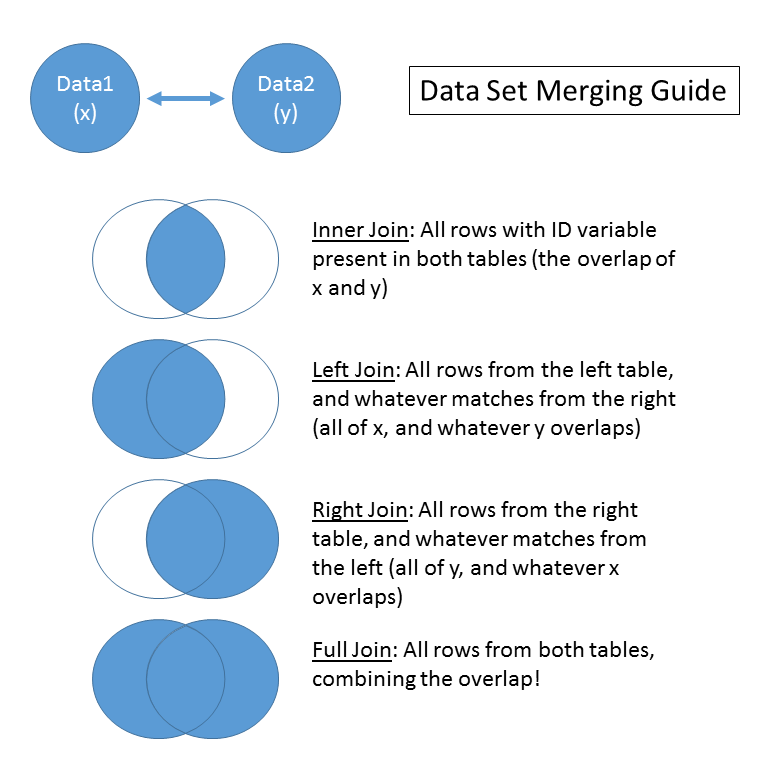

In [30]:
from IPython.display import Image
Image(filename='common/Merging_2.png')

Our first step should always be to check the merge column for unique and length. 

In [31]:
## Merging Datasets
# check uniques pre-merge
df_patient['PatientID'].nunique()

20000

In [32]:
df_visits['PatientID'].nunique() 

19951

In [33]:
# Check the overlap?
len(np.intersect1d(df_visits['PatientID'].unique(),
                   df_patient['PatientID'].unique()))

19951

In [34]:
# Left outer join
df_person_clust = \
    pd.merge(df_patient,
             df_visits,
             how='left',
             on='PatientID')
df_person_clust['PatientID'].nunique()

20000

In [35]:
# Inner join
df_person_clust = \
    pd.merge(df_patient,
             df_visits,
             how='inner',
             on='PatientID')

For more information, consult the Handbook's chapter on merges:   
https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

## Review

In this section, we covered:

*  Sorting Dataframes
*  Random Sampling Dataframes
*  Deal with Missing Data
*  Merging Dataframes